In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import re


In [7]:
def load_file(filenm):
    """
    Load xvg - file and return a pandas dataframe. 
    """
    data = []
    with open(filenm) as f:
        for line in f:
            #If line starts with @ or #, skip
            if line.startswith(('#', '@')):
                continue
            data.append([float(x) for x in re.split(r'\s+', line.strip())])
    return pd.DataFrame(data, columns=['time', 'value'])

In [8]:
def plot_variable_vs_exp(df, exp, name=None):
    """
    Plots reference distribution as normalised histogram, and variable as kde-plot.
    Also shows the value of the variable used in the simulation by a red line.
    """
    sns.histplot(df.value, stat='density', label='AA')
    ymin, ymax = plt.ylim()
    plt.plot([exp, exp], [ymin, ymax], color='red', label='Measured Value', ls='--', lw=2)
    plt.legend()
    plt.title(name)
    plt.show()
    #Print 99% confidence interval of mean
    print(f'Mean of variable: {df.value.mean():.3f}')
    print(f"99% confidence interval of mean: {df.value.mean() - 2.58*df.value.std()/np.sqrt(len(df)):.3f} - {df.value.mean() + 2.58*df.value.std()/np.sqrt(len(df)):.3f}")

In [9]:
experimental_values = {\
    'Double Bond' : 0.136,\
    'Upper PyrmAngle' : 0.678,\
    'Stator PyrmAngle' : 0.684,\
    'Dihedral Rings' : 1.21,\
    'Dihedral Methyle' : -6.32\
}

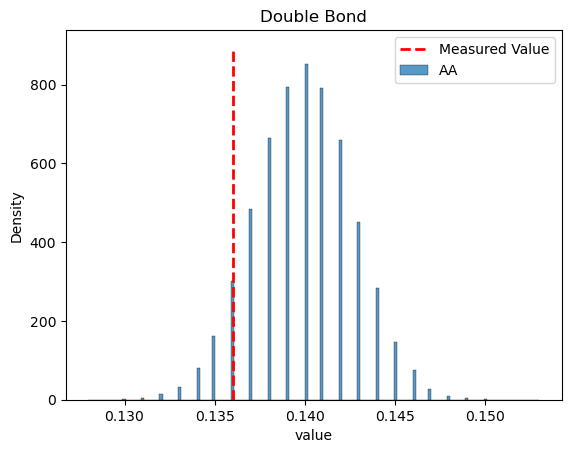

Mean of variable: 0.140
99% confidence interval of mean: 0.140 - 0.140


In [10]:
df = load_file('output/bond_0.xvg')
varnr = 'Double Bond'
experimental_value = experimental_values[varnr]    
plot_variable_vs_exp(df, experimental_value, name=varnr)

In [11]:
def pyrm(v1, v2):
    """
    Calculate the pyramidal angle between three vectors given the angle between two of them.
    """
    b = np.cos(np.deg2rad(v1))
    c = np.cos(np.deg2rad(v2))
    HL = (1 + b + c) / np.sqrt(3 + 2*(b+c+b*c))
    return 180 - np.rad2deg(np.arccos(HL)) - 90

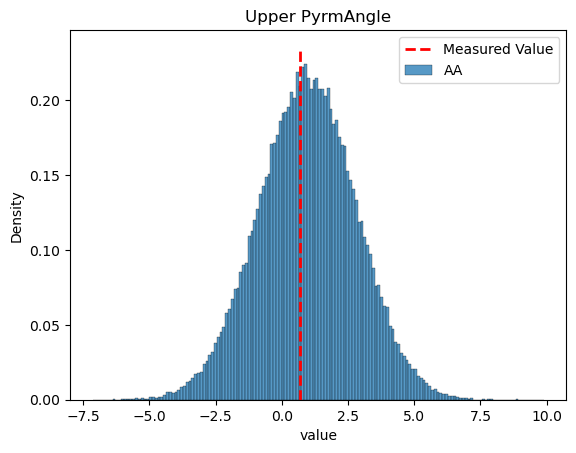

Mean of variable: 0.969
99% confidence interval of mean: 0.954 - 0.984


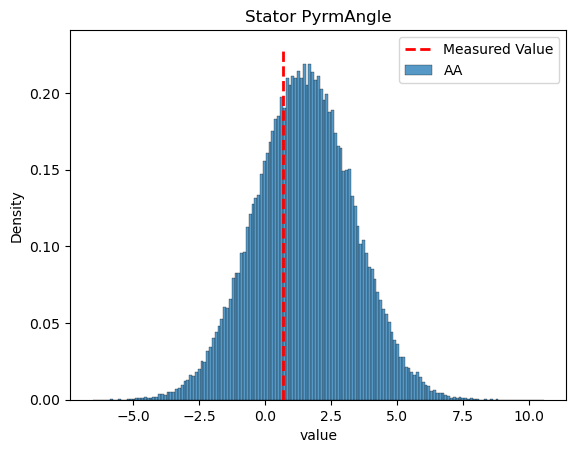

Mean of variable: 1.490
99% confidence interval of mean: 1.475 - 1.506


In [12]:
for i in range(0,4,2):
    RCC = load_file(f'output/ang_{i}.xvg')
    RCR = load_file(f'output/ang_{i+1}.xvg')
    varnr = ['Upper PyrmAngle', 'Stator PyrmAngle'][i//2]
    df = RCC
    df.value = pyrm(df.value, RCR.value)
    experimental_value = experimental_values[varnr]
    plot_variable_vs_exp(df, experimental_value, name=varnr)

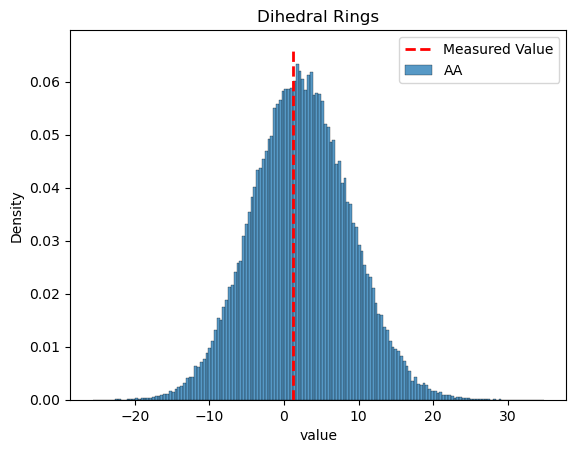

Mean of variable: 2.340
99% confidence interval of mean: 2.286 - 2.393


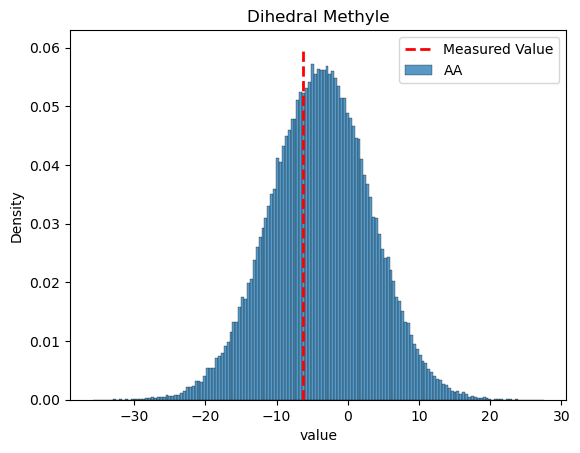

Mean of variable: -3.833
99% confidence interval of mean: -3.890 - -3.775


In [13]:
for i in range(2):
    df = load_file(f'output/dih_{i}.xvg')
    varnr = ['Dihedral Rings', 'Dihedral Methyle'][i]
    experimental_value = experimental_values[varnr]
    plot_variable_vs_exp(df, experimental_value, name=varnr)    